In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (8, 6)

In [ ]:
import pandas as pd

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [ ]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,count
target,
1,71
0,59
2,48


In [ ]:
X = wine.data
y = wine.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 1.66529275, -0.60840587,  1.21896194,  1.60540017, -0.16738426,
         0.80400157, -0.6916784 ,  1.26722552,  1.8775398 ,  3.41947305,
        -1.65632857, -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502,  1.60540017, -0.30437887,
        -0.78538376, -1.40123291,  2.04959953, -0.87350523, -0.0248012 ,
        -0.58463272, -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, -0.28270426, -0.8523573 ,
         1.93702874,  1.7467906 , -1.00165913,  0.58798744, -0.24006834,
         0.35845962,  0.2462267 , -0.24860607],
       [ 0.61294837, -0.61717858,  1.00331502,  0.87920616, -0.78385999,
         0.4892718 , -0.90154664,  1.18898812,  1.17258451,  2.8813052 ,
        -1.65632857, -1.12955031, -0.38138298],
       [ 0.11124931, -0.76631462, -0.93750727, -1.15413707, -0.16738426,
         0.17454204,  0.63748708, -0.68870952, -0.40926638, -0.58449577,
         0.95860929,  0.1350528 ,  0.94638614]])

In [ ]:
svm_no_pca = SVC(kernel='rbf', gamma='scale')
svm_no_pca.fit(X_train_scaled, y_train)

y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_no_pca))
print(classification_report(y_test, y_pred_no_pca))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.35900066 0.18691934 0.11606557]


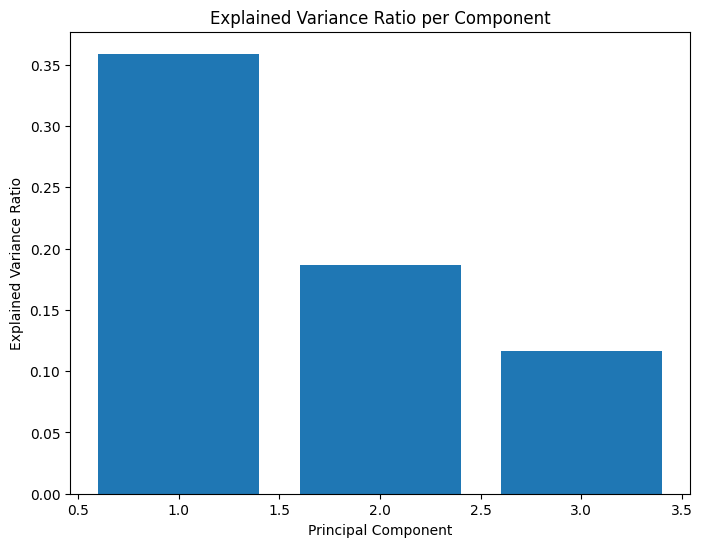

In [ ]:
plt.bar(range(1, 4), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio per Component")
plt.show()

In [ ]:
svm_pca = SVC(kernel='rbf', gamma='scale')
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)

print("Accuracy with PCA:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

Accuracy with PCA: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



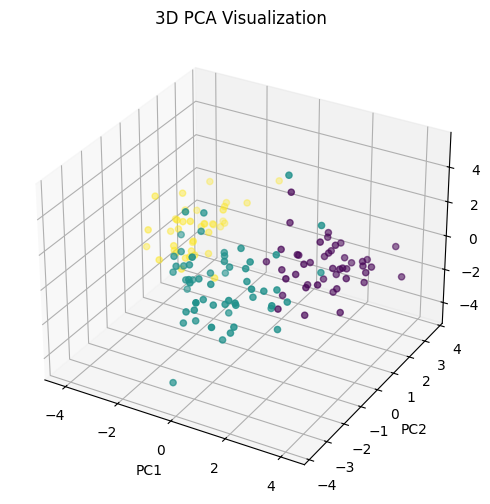

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=y_train
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA Visualization")
plt.show()

In [ ]:
print("Akurasi tanpa PCA:", accuracy_score(y_test, y_pred_no_pca))
print("Akurasi dengan PCA:", accuracy_score(y_test, y_pred_pca))

Akurasi tanpa PCA: 1.0
Akurasi dengan PCA: 1.0
